In [ ]:
import pandas as pd

df = pd.read_excel("bisiklet_fiyatlari.xlsx")
df.head()



,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


## verimiz hazır

In [ ]:
from sklearn.model_selection import train_test_split 
# burada ayırma işlemi yapıcaz ( %20 - %80 gibi ). O yüzden train_test_split kullanıcaz 

y = df['Fiyat'].values
y

.values diyerek numpy dizisi ( matrix haline getirdik )
ayrıca y ulaşmak istediğimiz değer yani label olduğunu unutma

In [ ]:
x = df[["BisikletOzellik1","BisikletOzellik2"]].values
x

array([[1749.628226, 1749.590668],
       [1748.007826, 1751.824206],
       [1750.122967, 1747.977026],
       ...,
       [1752.540381, 1747.98331 ],
       [1751.34929 , 1747.484989],
       [1748.656426, 1752.539962]])

x in bizim parametre değerlerimiz olduğunu unutma ( feature )
y = ax + b gibi bir denklem üzerinden düşün

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.33 , random_state=15 )


Burada verileri train ve test olarak parçaladık fakat önemli olan iki yer var. test_size ile test parçasının oranını veriyoruz. Diğer önemli nokta ise random_state ile verilerin karışması için bir çeşit yöntem seçiyorum. Bu yöntemi, başka bilgisayarda aynı sayıyı verirsem aynı çıktıyı elde edebildiğim için kullanıyorum.

In [ ]:
x_train.shape 
# matrisin boyutlarını döndürür

(670, 2)

# Scaling

Bu bölümde verilerimizi scale edeceğiz. Yani küçültme - ölçekleme yapacağız.

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
scaler.fit(x_train) 
# x train scale edilecek. Bu yüzden uygun hale getirildi.

x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test) 

x_train


array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

Şimdi veriler scale edilmiş oldu ve 0 - 1 arasına ölçeklendi.
Artık bunları kendi modelimize verebiliriz.

In [ ]:
import tensorflow 
from tensorflow.keras.models import Sequential  # Modelimizin üst sınıfı gibi 
from tensorflow.keras.layers import Dense       # Hangi katmanlar ile çalışacağız 

model = Sequential() 
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

Burada oluşturduğumuzu model Tensorflow'daki gördüğümüz yapay sinir ağları modelinin aynısı

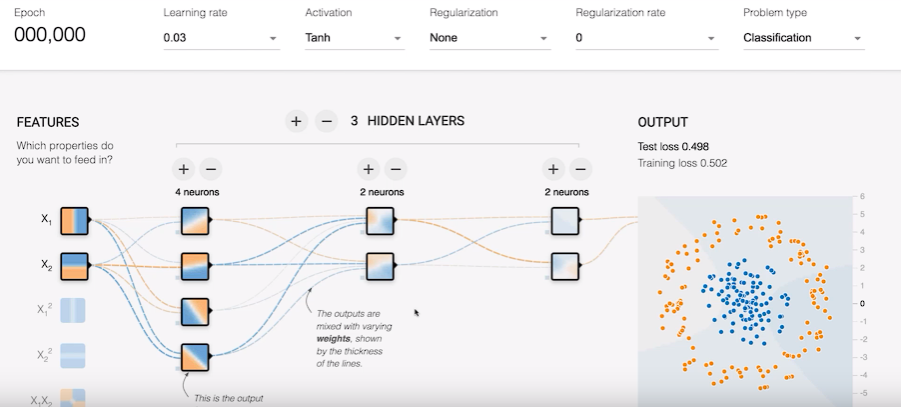

Bu resimde gördüğümüz her bir katmanda kaç nöron ve kaç katman olacağı koddaki Dense'e karşılık gelir.
Dense içerisindeki 5 nöron'a karşılık gelir. 
3 Hidden layer istiyorsak üç adet nesne eklememiz yeterlidir.

In [ ]:
model.add(Dense(1))  

Buradaki de çıktı katmanımız. Bir adet nörona sahip

In [ ]:
model.compile(optimizer="rmsprop", loss="mse") # rmsprop 

Şimdi modelimiz hazır. Artık eğitmeye başlayabiliriz. Ama dikkat etmemiz gereken bazı noktalar var.


In [ ]:
model.fit(x_train,y_train,epochs=250) 
# x train , ytrain ile eğitildi

## Model değerlendirmesi
Modelimiz hazır. Şimdi modelimizin tahminde ne kadar başarılı olduğuna bakalım. Bunu bir grafiğe dökelim.

In [ ]:
loss = model.history.history['loss']
# loss fonksiyonunun değerlerini bir dict tipinde verir. Bu verileri resmedicez.


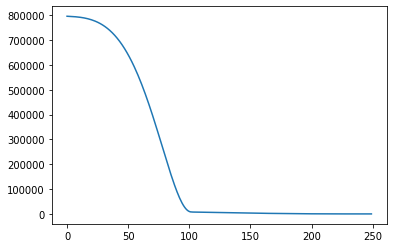

In [ ]:
import seaborn as sbn
# seaborn da matplotlib gibi bir araç.
sbn.lineplot(x=range(len(loss)), y=loss)

Şimdi ise değerlendirmemize bakalım. Train ve Test için ayrı ayrı görelim. verbose=0 verilince direk sonuç karşımıza gelir.

In [ ]:
trainLose = model.evaluate(x_train,y_train,verbose=0)
trainLose

74.12355041503906

In [ ]:
testLose = model.evaluate(x_test,y_test,verbose=0)
testLose

74.83441162109375

Burada ise x test verilerimizi verip y ile kıyaslamasını yapalım.Öncelikle test tahminlerini alalım. Sonra gerçek verileri pandas ile y test içerisinden alıp karşılaştıralım

In [ ]:
testTahminleri = model.predict(x_test)
testTahminleri.shape
# 330 , 1
type(testTahminleri)


11/11 [==============================] - 0s 1ms/step


numpy.ndarray

In [ ]:
tahminDf = pd.DataFrame(y_test,columns= ["Gerçek Y"])
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [ ]:
testTahminleri = pd.Series( testTahminleri.reshape(330,) )
# Boyutunu yeniden yapılandırdık. 330,0 boyutunda
testTahminleri.shape


(330,)

In [ ]:
tahminDf = pd.concat([tahminDf, testTahminleri] , axis=1) # tabloları birleştiriyorum 
tahminDf.columns = ["Gerçek Y","Tahmin Y"]
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,1077.566528
1,622.675990,625.123718
2,889.356810,876.476196
3,902.826733,895.188843
4,897.662404,900.540405
...,...,...
325,1028.438035,1013.433777
326,789.934950,792.007874
327,758.490486,766.643005
328,1172.871659,1166.867798


## Modelin son halini resmetme
Şimdi elimizde tahmin ve gerçek değer tablosu var. 
Bunları grafiğe dökelim.


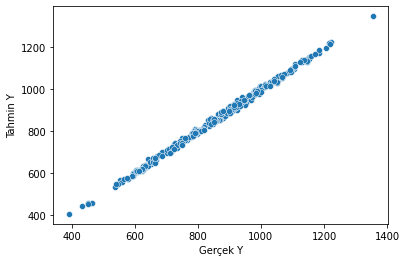

In [ ]:
sbn.scatterplot(x=tahminDf["Gerçek Y"],y=tahminDf['Tahmin Y'] ,data=tahminDf)